In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
import os

# Define the directory path
directory = r'E:\pd-data\enrollment'

# List all CSV files in the directory
csv_files = [f for f in os.listdir(directory) if f.endswith('.csv')]
print("CSV files found in directory:", csv_files)

# Check if any CSV files were found
if not csv_files:
    raise FileNotFoundError("No CSV files found in the directory: E:\\pd-cleaned\\enr-cleaned")

# List of columns to keep (non-genetic columns)
columns_to_keep = [
    'PATNO', 'EVENT_ID', 'AGE_AT_VISIT', 'REC_ID', 'PAG_NAME', 'INFODT', 'AFICBERB', 'ASHKJEW', 'BASQUE',
    'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES', 'HETERO', 'BISEXUAL', 'PANSEXUAL', 'ASEXUAL',
    'OTHSEXUALITY', 'HANDED', 'ANYFAMPD', 'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD',
    'FULSIB', 'FULBRO', 'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB',
    'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR', 'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR',
    'PAGPARPD', 'PAGFATHPD', 'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM', 'KIDSPD',
    'DISFAMPD', 'MATCOUS', 'MATCOUSPD', 'PATCOUS', 'PATCOUSPD', 'CLIA', 'GWAS', 'WES', 'WGS', 'SVs',
    'SANGER', 'IU_Fingerprint', 'RNASEQ', 'RNASEQ_VIS', 'APOE', 'PATHVAR_COUNT', 'VAR_GENE', 'LRRK2',
    'GBA', 'VPS35', 'SNCA', 'PRKN', 'PARK7', 'PINK1', 'NOTES', 'COHORT', 'COHORT_DEFINITION', 'ENROLL_DATE',
    'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM', 'ENROLL_AGE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY',
    'GAITSTDY', 'PISTDY', 'SV2ASTDY', 'NXTAUSTDY', 'DATELIG', 'PPMI_ONLINE_ENROLL', 'ENRLPINK1',
    'ENRLPRKN', 'ENRLSRDC', 'ENRLNORM', 'ENRLOTHGV', 'ENRLHPSM', 'ENRLRBD', 'ENRLLRRK2', 'ENRLSNCA',
    'ENRLGBA', 'EDUCYRS', 'EducationCountry', 'EducationLevel', 'EDUCYRS_EQUIV', 'APPRDX'
]

df_merged = None
for file in csv_files:
    file_path = os.path.join(directory, file)
    print(f"Loading file: {file}")
    df = pd.read_csv(file_path)

    # Print columns in the current file for debugging
    print(f"Columns in {file}:", df.columns.tolist())

    # Check if both PATNO and EVENT_ID exist in the file
    if 'PATNO' not in df.columns or 'EVENT_ID' not in df.columns:
        print(f"Warning: 'PATNO' or 'EVENT_ID' not found in {file}. Skipping this file.")
        continue

    # If this is the first file, set it as the base DataFrame
    if df_merged is None:
        df_merged = df
    else:
        # Merge with the existing DataFrame on 'PATNO' and 'EVENT_ID' (outer join)
        df_merged = df_merged.merge(df, on=['PATNO', 'EVENT_ID'], how='outer', suffixes=('', '_dup'))

        # Handle duplicate columns (keep first non-NaN value)
        for col in df_merged.columns:
            if col.endswith('_dup'):
                original_col = col.replace('_dup', '')
                if original_col in df_merged.columns:
                    df_merged[original_col] = df_merged[original_col].combine_first(df_merged[col])
                    df_merged = df_merged.drop(columns=col)

# Check if merging was successful
if df_merged is None:
    raise ValueError("No valid DataFrames with 'PATNO' and 'EVENT_ID' were found to merge.")

# Check which columns from columns_to_keep exist in the merged DataFrame
existing_columns = [col for col in columns_to_keep if col in df_merged.columns]
missing_columns = [col for col in columns_to_keep if col not in df_merged.columns]

# Print all columns in the merged DataFrame
print("\nAll columns in merged DataFrame:", df_merged.columns.tolist())

# Print missing columns for debugging
if missing_columns:
    print("The following columns were not found in the merged DataFrame:", missing_columns)
else:
    print("All specified columns were found in the merged DataFrame.")

# Filter to keep only existing columns
df_filtered = df_merged[existing_columns]

# Further filter to keep only columns with at least one non-NaN, non-zero value
non_null_non_zero_columns = [
    col for col in df_filtered.columns
    if df_filtered[col].notna().any() and (df_filtered[col][df_filtered[col].notna()] != 0).any()
]
df_filtered = df_filtered[non_null_non_zero_columns]

# Print columns that were removed due to containing only NaN or only zero values
excluded_columns = [col for col in existing_columns if col not in non_null_non_zero_columns]
if excluded_columns:
    print("The following columns were removed because they contain only NaN or only zero values:", excluded_columns)
else:
    print("No columns were removed for containing only NaN or only zero values.")

# Save the filtered DataFrame to the specified directory
output_file = os.path.join(directory, 'filterdata.csv')
df_filtered.to_csv(output_file, index=False)
print(f"\nFiltered dataset saved to: {output_file}")

# Display the first few rows of the filtered DataFrame
print("\nFiltered DataFrame (first 5 rows):")
print(df_filtered.head())

# Display the columns in the filtered dataset
print("\nColumns in filtered dataset:", df_filtered.columns.tolist())

CSV files found in directory: ['Age_at_visit_16Sep2025.csv', 'Family_History_16Sep2025.csv', 'filterdata.csv', 'iu_genetic_consensus_20250515_16Sep2025.csv', 'Participant_Status_16Sep2025.csv', 'PPMI_PD_Variants_Genetic_Status_WGS_20180921.csv', 'PPMI_Project_9001_20250624_16Sep2025.csv', 'Socio-Economics_16Sep2025.csv', 'Subject_Cohort_History_16Sep2025.csv']
Loading file: Age_at_visit_16Sep2025.csv
Columns in Age_at_visit_16Sep2025.csv: ['PATNO', 'EVENT_ID', 'AGE_AT_VISIT']
Loading file: Family_History_16Sep2025.csv
Columns in Family_History_16Sep2025.csv: ['REC_ID', 'PATNO', 'EVENT_ID', 'PAG_NAME', 'INFODT', 'ANYFAMPD', 'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULBRO', 'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR', 'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR', 'PAGPARPD', 'PAGFATHPD', 'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM', 'KIDSPD', 'DISFAMPD', 'MATCOUS', 'MATC

C:\Users\Helan\AppData\Local\Temp\ipykernel_26188\732091876.py:36: DtypeWarning: Columns (66,67,68,69,70,71,72,73,82,102,103) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Columns in filterdata.csv: ['PATNO', 'EVENT_ID', 'AGE_AT_VISIT', 'REC_ID', 'PAG_NAME', 'INFODT', 'AFICBERB', 'ASHKJEW', 'BASQUE', 'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES', 'HETERO', 'BISEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'HANDED', 'ANYFAMPD', 'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULBRO', 'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR', 'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR', 'PAGPARPD', 'PAGFATHPD', 'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM', 'KIDSPD', 'DISFAMPD', 'MATCOUS', 'MATCOUSPD', 'PATCOUS', 'PATCOUSPD', 'CLIA', 'GWAS', 'WES', 'WGS', 'SVs', 'SANGER', 'IU_Fingerprint', 'RNASEQ', 'RNASEQ_VIS', 'APOE', 'PATHVAR_COUNT', 'VAR_GENE', 'LRRK2', 'GBA', 'VPS35', 'SNCA', 'PRKN', 'PARK7', 'PINK1', 'NOTES', 'COHORT', 'COHORT_DEFINITION', 'ENROLL_DATE', 'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM', 'ENROLL_AGE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY', 'GAITSTDY',

In [ ]:
df_filtered.head(30)

,PATNO,EVENT_ID,AGE_AT_VISIT,REC_ID,PAG_NAME,INFODT,AFICBERB,ASHKJEW,BASQUE,BIRTHDT,...,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA,EDUCYRS,EducationCountry,EducationLevel,EDUCYRS_EQUIV,APPRDX
0,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
1,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
2,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
3,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
4,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
5,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
6,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
7,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
8,3000,R18,81.4,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
9,3000,R18,81.4,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0


In [ ]:
directory = r'E:\pd-cleaned\enr-cleaned'
output_file = os.path.join(directory, 'filterdata.csv')

# Save the filtered DataFrame
df_filtered.to_csv(output_file, index=False)
print(f"Filtered dataset saved to: {output_file}")

Filtered dataset saved to: E:\pd-cleaned\enr-cleaned\filterdata.csv


In [ ]:
df = pd.read_csv(r'E:\pd-cleaned\enr-cleaned\filterdata.csv')

In [ ]:
columns_to_remove = ['BIRTHDT', 'HOWLIVE', 'GAYLES', 'HETERO', 'BISEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'INEXPAGE', 'EducationCountry', 'EducationLevel', 'EDUCYRS_EQUIV', 'APPRDX']

# Remove specified columns from df_filtered
df_filtered = df_filtered.drop(columns=[col for col in columns_to_remove if col in df_filtered.columns])

# Define the directory and output file path
directory = r'E:\pd-cleaned\enr-cleaned'
output_file = os.path.join(directory, 'filterdata.csv')

# Save the filtered DataFrame
df_filtered.to_csv(output_file, index=False)
print(f"Filtered dataset saved to: {output_file}")

Filtered dataset saved to: E:\pd-cleaned\enr-cleaned\filterdata.csv


In [ ]:
df.head(5)

,PATNO,EVENT_ID,AGE_AT_VISIT,REC_ID,PAG_NAME,INFODT,SEX,CHLDBEAR,HANDED,ANYFAMPD,...,GAITSTDY,PISTDY,SV2ASTDY,NXTAUSTDY,DATELIG,PPMI_ONLINE_ENROLL,ENRLSRDC,ENRLNORM,ENRLHPSM,ENRLRBD
0,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NO,0.0,NaN,0.0,0.0
1,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NO,0.0,NaN,0.0,0.0
2,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NO,0.0,NaN,0.0,0.0
3,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,NaN,NO,0.0,NaN,0.0,0.0
4,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,1.0,NaN,...,0.0,0.0,0.0,0.0,NaN,NO,0.0,NaN,0.0,0.0


In [ ]:
df.columns

Index(['PATNO', 'APPRDX', 'COHORT'], dtype='object')

In [ ]:
cohort_counts = df['COHORT'].value_counts()
print(cohort_counts)

COHORT
1    445
4    389
2    111
3      3
Name: count, dtype: int64


In [ ]:
df_filtered['PATNO'] = df_filtered['PATNO'].astype(str)
df_filtered.to_csv('enrollment_df.csv', index=False)

In [ ]:
print("Columns in enrollment_df:", df_filtered.columns.tolist())

Columns in enrollment_df: ['PATNO', 'EVENT_ID', 'AGE_AT_VISIT', 'REC_ID', 'PAG_NAME', 'INFODT', 'AFICBERB', 'ASHKJEW', 'BASQUE', 'BIRTHDT', 'SEX', 'CHLDBEAR', 'HOWLIVE', 'GAYLES', 'HETERO', 'BISEXUAL', 'ASEXUAL', 'OTHSEXUALITY', 'HANDED', 'ANYFAMPD', 'BIOMOM', 'BIOMOMPD', 'BIODAD', 'BIODADPD', 'FULSIB', 'FULBRO', 'FULSIS', 'FULSIBPD', 'FULBROPD', 'FULSISPD', 'HAFSIB', 'PAHAFSIB', 'MAHAFSIB', 'HAFSIBPD', 'MAHAFSIBPD', 'PAHAFSIBPD', 'MAGPAR', 'MAGPARPD', 'MAGFATHPD', 'MAGMOTHPD', 'PAGPAR', 'PAGPARPD', 'PAGFATHPD', 'PAGMOTHPD', 'MATAU', 'MATAUPD', 'PATAU', 'PATAUPD', 'KIDSNUM', 'KIDSPD', 'DISFAMPD', 'MATCOUS', 'MATCOUSPD', 'PATCOUS', 'PATCOUSPD', 'CLIA', 'GWAS', 'WES', 'WGS', 'SVs', 'SANGER', 'IU_Fingerprint', 'RNASEQ', 'RNASEQ_VIS', 'APOE', 'PATHVAR_COUNT', 'VAR_GENE', 'LRRK2', 'GBA', 'VPS35', 'SNCA', 'PRKN', 'PARK7', 'PINK1', 'NOTES', 'COHORT', 'COHORT_DEFINITION', 'ENROLL_DATE', 'ENROLL_STATUS', 'STATUS_DATE', 'SCREENEDAM', 'ENROLL_AGE', 'INEXPAGE', 'AV133STDY', 'TAUSTDY', 'GAITSTDY', 

In [ ]:
df_filtered.head(200)

,PATNO,EVENT_ID,AGE_AT_VISIT,REC_ID,PAG_NAME,INFODT,AFICBERB,ASHKJEW,BASQUE,BIRTHDT,...,ENRLHPSM,ENRLRBD,ENRLLRRK2,ENRLSNCA,ENRLGBA,EDUCYRS,EducationCountry,EducationLevel,EDUCYRS_EQUIV,APPRDX
0,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
1,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
2,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
3,3000,BL,69.1,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
4,3000,R17,80.5,IA86904,SCREEN,Jan-11,0.0,0.0,0.0,Dec-41,...,0.0,0.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,3001,V14,72.1,IA86905,SCREEN,Feb-11,0.0,0.0,0.0,Jan-46,...,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,1.0
196,3001,V15,73.2,733240301,FAMHXPD,03/2019,0.0,0.0,0.0,Jan-46,...,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,1.0
197,3001,V15,73.2,733240301,FAMHXPD,03/2019,0.0,0.0,0.0,Jan-46,...,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,1.0
198,3001,V15,73.2,733240301,FAMHXPD,03/2019,0.0,0.0,0.0,Jan-46,...,0.0,0.0,0.0,0.0,0.0,16.0,NaN,NaN,NaN,1.0


Patient 100001
      EVENT_ID  APPRDX
83369       BL     NaN
83370      R06     NaN
83371      R08     NaN
83372      R10     NaN
83373       SC     NaN
83374      V02     NaN
83375      V04     NaN
83376      V05     NaN
83377      V06     NaN
83378      V08     NaN
83379      V10     NaN
83380      V12     NaN
------
Patient 100002
      EVENT_ID  APPRDX
83381       BL     NaN
83382      R08     NaN
83383      R10     NaN
83384       SC     NaN
83385      V02     NaN
83386      V04     NaN
83387      V05     NaN
83388      V08     NaN
83389      V10     NaN
------
Patient 100004
      EVENT_ID  APPRDX
83390       BL     NaN
83391       SC     NaN
------
Patient 100005
      EVENT_ID  APPRDX
83392       BL     NaN
83393       SC     NaN
83394      V02     NaN
83395      V04     NaN
83396      V05     NaN
83397      V06     NaN
83398      V08     NaN
------
Patient 100006
      EVENT_ID  APPRDX
83399       BL     NaN
83400      R06     NaN
83401      R08     NaN
83402      R10     NaN


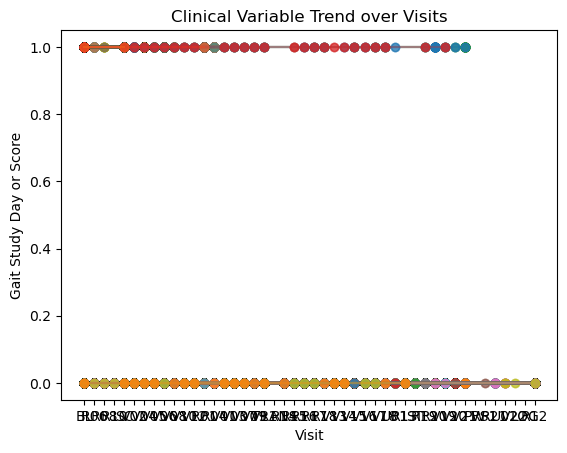

In [ ]:
# Sort and group data
df_sorted = df_filtered.sort_values(['PATNO', 'EVENT_ID'])

# Select key variables to track condition (adjust as needed)
condition_vars = ['APPRDX', 'GAITSTDY', 'PISTDY', 'TAUSTDY']

# Example: Change in diagnosis over visits for each patient
for patno, group in df_sorted.groupby('PATNO'):
    print(f"Patient {patno}")
    print(group[['EVENT_ID', 'APPRDX']])
    print("------")

# Plotting example for a clinical variable over visits
import matplotlib.pyplot as plt

for patno, group in df_sorted.groupby('PATNO'):
    plt.plot(group['EVENT_ID'], group['GAITSTDY'], marker='o', alpha=0.3)

plt.xlabel('Visit')
plt.ylabel('Gait Study Day or Score')
plt.title('Clinical Variable Trend over Visits')
plt.show()
